# CNN - Transfer Learning

In [1]:
!pip install -q tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 30.8MB/s 
     |████████████████████████████████| 450kB 44.1MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__, tf.test.gpu_device_name())
device_lib.list_local_devices()

2.0.0 /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13664879126081296182, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16497026157774812988
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13289332438041370030
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15956161332
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17208860563642628712
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [3]:
!pip install tensorflow_hub
import tensorflow_hub as hub

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [0]:
IMAGE_SHAPE = (224, 224)

In [6]:
data_path = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 4s 0us/step


In [7]:
data_path

'/root/.keras/datasets/flower_photos'

In [8]:
!ls -lah /root/.keras/datasets/flower_photos

total 620K
drwxr-x--- 7 270850 5000 4.0K Feb 10  2016 .
drwxr-xr-x 3 root   root 4.0K Nov  8 02:15 ..
drwx------ 2 270850 5000  36K Feb 10  2016 daisy
drwx------ 2 270850 5000  52K Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 409K Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36K Feb 10  2016 roses
drwx------ 2 270850 5000  36K Feb 10  2016 sunflowers
drwx------ 2 270850 5000  40K Feb 10  2016 tulips


In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [10]:
image_data = image_generator.flow_from_directory(str(data_path), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


In [11]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


## Load pre-trained model

In [0]:
mobilenetV2_URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'

In [0]:
mobilenetV2 = hub.KerasLayer(mobilenetV2_URL, input_shape= IMAGE_SHAPE + (3,))

In [0]:
mobilenetV2.trainable = False

## Play with the data

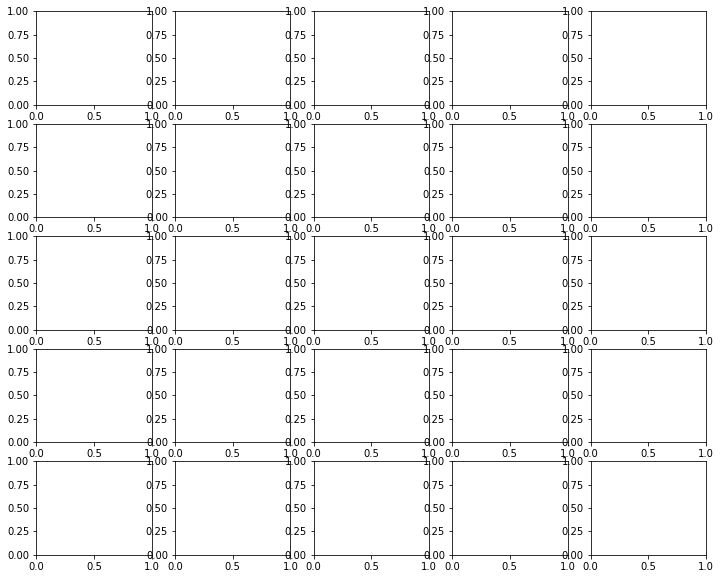

In [15]:
fig1, ax1 = plt.subplots(nrows=5, ncols=5, figsize=(12, 10));

In [0]:
for i in range(5):
		for j in range(5):
			ax1[i, j].axis('off')
			ax1[i, j].grid(False)
			ax1[i, j].set_xticks([])
			ax1[i, j].set_yticks([])

In [0]:
index = 0;
for i in range(5):
    for j in range(5):
        ax1[i, j].imshow(image_batch[index])
        index += 1

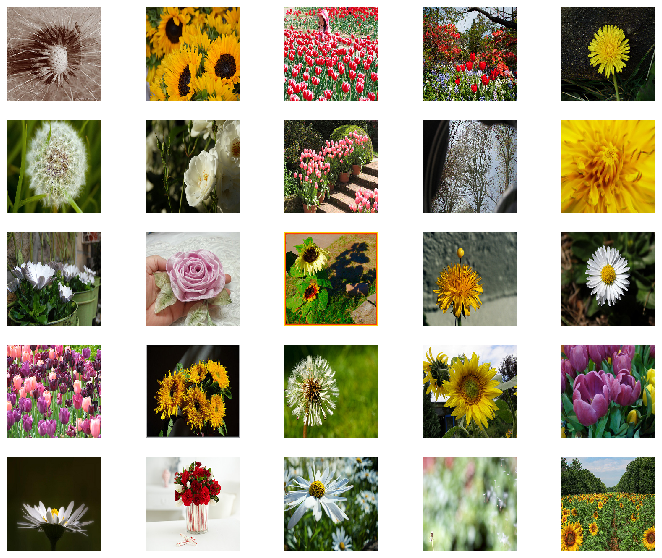

In [18]:
fig1

## Build the model

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add(mobilenetV2)
model.add(tf.keras.layers.Dense(image_data.num_classes, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [0]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

In [24]:
result = model.fit_generator(image_data, epochs=10, steps_per_epoch=steps_per_epoch)

Epoch 1/10
115/115 [==============================] - 36s 309ms/step - loss: 0.6733 - accuracy: 0.7504
Epoch 2/10
115/115 [==============================] - 25s 218ms/step - loss: 0.3398 - accuracy: 0.8926
Epoch 3/10
115/115 [==============================] - 25s 217ms/step - loss: 0.2679 - accuracy: 0.9134
Epoch 4/10
115/115 [==============================] - 25s 217ms/step - loss: 0.2217 - accuracy: 0.9292
Epoch 5/10
115/115 [==============================] - 25s 217ms/step - loss: 0.1930 - accuracy: 0.9398
Epoch 6/10
115/115 [==============================] - 25s 217ms/step - loss: 0.1685 - accuracy: 0.9534
Epoch 7/10
115/115 [==============================] - 25s 217ms/step - loss: 0.1511 - accuracy: 0.9594
Epoch 8/10
115/115 [==============================] - 25s 217ms/step - loss: 0.1345 - accuracy: 0.9643
Epoch 9/10
115/115 [==============================] - 25s 217ms/step - loss: 0.1250 - accuracy: 0.9687
Epoch 10/10
115/115 [==============================] - 25s 219ms/step - l

## Evaluate the model

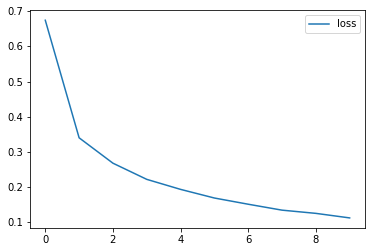

In [25]:
plt.plot(result.history['loss'], label='loss')
plt.legend()

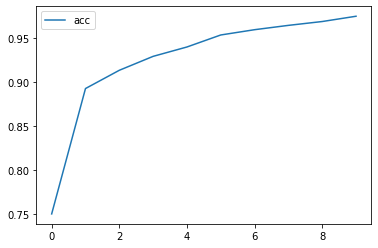

In [26]:
plt.plot(result.history['accuracy'], label='acc')
plt.legend()